<a href="https://colab.research.google.com/github/meet108/Datascience_Project/blob/main/Cardiac_arrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Part-1: Data Exploration and Pre-processing**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Datascience_projects/ML Project - Clustering Cardiac Arrest U16955461930.csv")
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


# 2. Check null values

In [5]:
data.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

# 3. Print information about dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

# 4. Describe dataset in statistic form

In [7]:
data.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Drop under risk column

In [8]:
datadrop = ['UnderRisk']
data = data.drop(columns=datadrop)

In [9]:
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,1,1,0,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0


# **Part-2**:  **Working** **with** **Models**

# 1. Apply Kmean clustering on dataset

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [11]:
km = KMeans(n_clusters=3,)
km.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
clustering_data = ['Chain_smoker','Consumes_other_tobacco_products','HighBP','Diabetes','Respiratory_illness','Use_of_stimulant_drugs']

In [13]:
y_predicted = km.fit_predict(data[clustering_data])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0,

# 3. Create column cluster for predicted labels value

In [14]:
data['cluster']=y_predicted
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,2
1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,1


# 2. Print cluster centers

In [15]:
km.cluster_centers_

array([[-4.99600361e-16,  1.00000000e+00,  7.01492537e-02,
         6.26865672e-02,  3.58208955e-02,  6.41791045e-02],
       [-9.71445147e-17, -6.66133815e-16,  1.25000000e-01,
         3.57142857e-02,  2.67857143e-02,  2.32142857e-01],
       [ 1.00000000e+00,  7.00934579e-01,  1.49532710e-01,
         2.80373832e-02,  1.86915888e-02,  3.73831776e-02]])

In [16]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

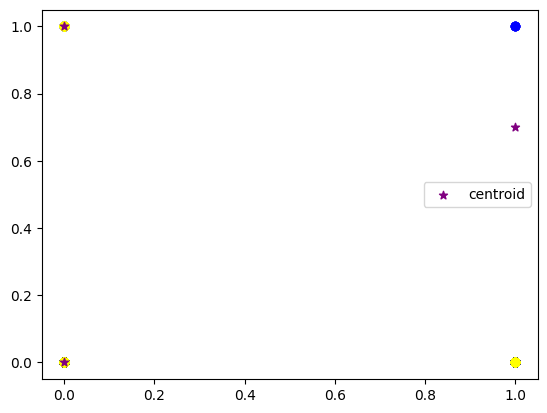

In [17]:
plt.scatter(data1.HighBP,data1['Chain_smoker'],color='green')
plt.scatter(data2.HighBP,data2['Consumes_other_tobacco_products'],color='red')
plt.scatter(data3.HighBP,data3['Diabetes'],color='black')
plt.scatter(data1.HighBP,data1['Respiratory_illness'],color='blue')
plt.scatter(data2.HighBP,data2['Use_of_stimulant_drugs'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
score = silhouette_score(data, y_predicted)
score

0.5191394140304193

# 4. Plot the hierarchical clustering using scipy

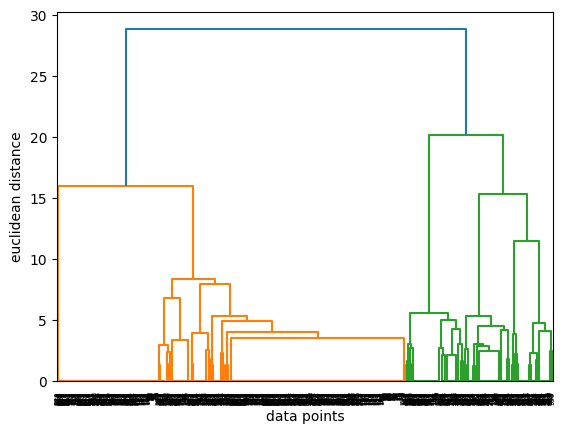

In [20]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

# 5. Apply Agglomerative Clustering using number of clusters

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# 6. Create label column for predicted cluster label

In [23]:
data["label"] = cluster

In [24]:
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster,label
0,1,1,1,0,1,0,0,0,1,0,0,0,2,2
1,1,0,1,0,1,0,0,0,1,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,1,1


# 7. Show label counts.

In [25]:
data.label.value_counts()

0    627
1    159
2    103
Name: label, dtype: int64

# 8. Show a silhouette score

In [26]:
score_agg = silhouette_score(data, cluster)
score_agg

0.5657628121143262